# Companies project

### link to github with projFinal file: https://github.com/maccma01/cs391_project1
### link to kaggle where to find companies data: https://www.kaggle.com/jsche4/open-data-500-companies


### roughly 18 seconds to run from top to bottom


### Goal: The goal of this project was to determine what factors make a company successful . 
### Brief description: We gathered data that included factors such as: state, company type (private, public..), company category (tech/finance...), revenue, etc. and we are trying to see how different models can predict how successful a new company can be based on the features we have. The determination of success comes from a degree of success variable that can be 0 (not successful), 1 (average), 2 (successful).


### Group members: Mateus Maccieri, Tayvon Wright, Ogden Leyens



### Summary findings: From our basic analysis we found out we mainly have a lot of small companies with small revenues, some small ones with big revenues, or big companies with huge revenues. There is not a lot of companies in between that can make our data more uniform. 
### Our degree of success boundaries are also very wide. This probably shows why we obtain around 95-98% accuracy score with support vector machines, along with the fact we have a lot of categorical data witihin our features. 
### The companies degrees that were predicted wrong are companies that have the revenue to size ratio very close to those boundaries.  
### Multiple linear regression, however, has a R^2 of 1.0 and the fact that we have these big differences between our ratios and there is not good correlation between any two specific features make it very hard to interpret.
### The other different models we tried such as neural networks and naive Bayes can definitely be improved by increasing the amount of data with a lot more medium to big companies.

### As a conclusion, from our findings, the features that allow us to obtain a really good score with support vector machines are state, size, company type, company_category, the different business models, revenue, age

### What's missing: We are missing a lot of data that can improve our models and that can allow us to draw better and clear conclusions. We are also missing better features to help us really understand the impact of each specific feature. We need more numerical continuous features as well to run regression.

# The data can be found in this link:

https://www.kaggle.com/jsche4/open-data-500-companies



In [404]:
# import numerical libraries
import numpy as np   

# import preprocessing imputer (to replace missing values)
from sklearn.preprocessing import Imputer

# to handle data in form of rows and columns 
import pandas as pd    

# import ploting libraries
import matplotlib.pyplot as plt   

# draw the charts here as part of the notebook 
%matplotlib inline

# import for statistical plots
import seaborn as sns

# import for math functions
import math

## Load data

The data can be downloaded here: https://www.kaggle.com/jsche4/open-data-500-companies

In [405]:
# data csv file contained in the same folder as the project
datafn = 'us_companies.csv'

df = pd.read_csv(datafn, na_values = ['?'], header = None)

# check first five rows of the dataset
print(df.head())

                     0                            1             2   \
0          company_name                          url  year_founded   
1  3 Round Stones, Inc.      http://3RoundStones.com          2010   
2     48 Factoring Inc.  https://www.48factoring.com          2014   
3           5PSolutions          www.5psolutions.com          2007   
4        Abt Associates                 abtassoc.com          1965   

              3      4        5         6                    7             8   \
0           city  state  country  zip_code  full_time_employees  company_type   
1     Washington     DC       us     20004               10-Jan       Private   
2   Philadelphia     PA       us     19087               51-200       Private   
3        Fairfax     VA       us     22003               10-Jan       Private   
4      Cambridge     MA       us      2138          1,001-5,000       Private   

                      9                                                  10  \
0       compa

______

In [406]:
print('Each element in the first row of the dataset should be the name of each column')
print('Reset first row index as 0 instead of 1 and drop initial columns that we do not need')

Each element in the first row of the dataset should be the name of each column
Reset first row index as 0 instead of 1 and drop initial columns that we do not need


In [407]:
df.columns = df.iloc[0]
df.drop(axis = 0, index = 0, inplace = True)

df.reset_index(drop = True, inplace = True)

# drop url, zip_code
df.drop(['zip_code', 'country'], axis = 1, inplace = True)
print(df.columns)
print(df.head())

Index(['company_name', 'url', 'year_founded', 'city', 'state',
       'full_time_employees', 'company_type', 'company_category',
       'revenue_source', 'business_model'],
      dtype='object', name=0)
0          company_name                          url year_founded  \
0  3 Round Stones, Inc.      http://3RoundStones.com         2010   
1     48 Factoring Inc.  https://www.48factoring.com         2014   
2           5PSolutions          www.5psolutions.com         2007   
3        Abt Associates                 abtassoc.com         1965   
4                Accela        http://www.accela.com         1999   

0           city state full_time_employees company_type  \
0     Washington    DC              10-Jan      Private   
1   Philadelphia    PA              51-200      Private   
2        Fairfax    VA              10-Jan      Private   
3      Cambridge    MA         1,001-5,000      Private   
4      San Ramon    CA           501-1,000      Private   

0       company_category   

____

In [408]:
print('Checking the amount of NaN values per column\n')

print('The columns with few values will be fixed immediately, the ones with many values (>10) will be after.')
for col in df.columns:
    print('Checking column: ', col)
    print(df[col].isnull().sum(axis = 0))
    print('\n')

Checking the amount of NaN values per column

The columns with few values will be fixed immediately, the ones with many values (>10) will be after.
Checking column:  company_name
0


Checking column:  url
0


Checking column:  year_founded
1


Checking column:  city
33


Checking column:  state
0


Checking column:  full_time_employees
29


Checking column:  company_type
16


Checking column:  company_category
3


Checking column:  revenue_source
10


Checking column:  business_model
76




In [409]:
print('Getting value counts for each column\n')
for col in df.columns:
    print('Value counts: ', col)
    print(df[col].value_counts())
    print('\n')
    

Getting value counts for each column

Value counts:  company_name
Rapid Cycle Solutions                  1
PayScale, Inc.                         1
Bridgewater                            1
Knoema                                 1
5PSolutions                            1
ProPublica                             1
Datamyne                               1
SeeClickFix                            1
Golden Helix                           1
SigFig                                 1
Boston Consulting Group                1
Mozio                                  1
DataMade                               1
ReciPal                                1
DataLogix                              1
Connotate                              1
MedWatcher                             1
Revaluate                              1
Altova                                 1
(Leg)Cyte                              1
Teradata                               1
Yelp                                   1
Ecodesk                         

In [410]:
print('checking if all values are not spelled incorrectly\n')
for col in df.columns:
    print('Value counts: ', col)
    print(df[col].unique())
    print('\n')

checking if all values are not spelled incorrectly

Value counts:  company_name
['3 Round Stones, Inc.' '48 Factoring Inc.' '5PSolutions' 'Abt Associates'
 'Accela' 'Accenture' 'AccuWeather' 'Acxiom' 'Adaptive'
 'Adobe Digital Government' 'Aidin' 'Alarm.com' 'Allianz'
 'Allied Van Lines' 'AllState Insurance Group' 'Alltuition' 'Altova'
 'Amazon Web Services' 'American Red Ball Movers'
 'Amida Technology Solutions' 'Analytica' 'Apextech LLC' 'Appallicious'
 'Aquicore' 'Archimedes Inc.' 'AreaVibes Inc.' 'Arpin Van Lines'
 'Arrive Labs' 'ASC Partners' 'Asset4' 'Atlas Van Lines' 'AtSite'
 'Aunt Bertha, Inc.' 'Aureus Sciences (*Now part of Elsevier)'
 'AutoGrid Systems' 'Avalara' 'Avvo' 'Ayasdi' 'Azavea' 'BaleFire Global'
 'Barchart' 'Be Informed' 'Bekins' 'Berkery Noyes MandASoft'
 'Berkshire Hathaway' 'BetterLesson' 'BillGuard' 'Bing' 'Biovia' 'BizVizz'
 'BlackRock' 'Bloomberg' 'Booz Allen Hamilton' 'Boston Consulting Group'
 'Boundless' 'Bridgewater' 'Brightscope' 'BuildFax' 'Buildingeye

In [411]:
print('By looking at the data there are some columns with "weird" values. We will handle those\n')
print('starting with changing full time employees name to size')

By looking at the data there are some columns with "weird" values. We will handle those

starting with changing full time employees name to size


### Starting with full_time_employees column. 

Online research on first five companies in regards to number of employees:
    
    3 Round Stones, Inc.: 1-10
    5PSolutions: 1-10
    Aidin: 1-10
    Alltuition: 11-50
    Amida Technology Solutions: 11-50
    
The research shows results for the companies today. Therefore, the companies probably grew in size. We can safely say the value '10-Jan' meant that specific company has 1-10 employees.


Online research on first five companies in regards to number of employees:
    
    Adaptive: 51 - 200
    American Red Ball Movers: 201-500
    Analytica: 51
    Apextech LLC: 101 - 250 
    Appallicious: 11 - 50

The research shows results for the companies today. The companies probably grew in size and from the value_counts() function we can see we are missing now 11-50 (November is also the month number 11). We can safely say the value 'Nov-50' meant that specific company has 11-50 employees.

In [412]:
df.rename(columns = {'full_time_employees': 'size'}, inplace=True)

df['size'] = df['size'].replace(to_replace = '10-Jan', value = '1-10')

df['size'] = df['size'].replace(to_replace = 'Nov-50', value = '11-50')

print('size value counts:\n', df['size'].value_counts())

size value counts:
 1-10            143
11-50           115
51-200           93
10,001+          56
1,001-5,000      30
201-500          25
501-1,000        22
5,001-10,000     16
Name: size, dtype: int64


### Replacing the company types to Private, Public, Nonprofit, and Other

Our main focus will be on private and public. But we are interested to see what nonprofit or other types of companies can tell us.

In [413]:
df['company_type'] = df["company_type"].replace(to_replace = ["partnership", 
                                                 "Partnership", 
                                                 "Permitting Assistance", 
                                                 "Public (Federal-USGS)", 
                                                 "sole proprietorship", 
                                                 "nonprofit + commercial spinoff"], value = "Other")
print('company type value counts after fixing names\n', df['company_type'].value_counts())

company type value counts after fixing names
 Private      396
Public        92
Nonprofit     15
Other         10
Name: company_type, dtype: int64


### Fixing city names

In [414]:

df = df.replace({' Philadelphia':'Philadelphia'})
df = df.replace({'New York City': 'New York'})
df = df.replace({'Washington DC': 'Washington'})
df = df.replace({'Washington, D.C.': 'Washington'})

print('city names after being fixed\n', df['city'].unique())

city names after being fixed
 ['Washington' 'Philadelphia' 'Fairfax' 'Cambridge' 'San Ramon' 'Chicago'
 'State College' 'Little Rock' 'Irvine' 'San Jose' 'New York'
 'Leesburg Pike Vienna' 'Oakbrook Terrace' 'Northbrook' 'Beverly'
 'Seattle' 'Indianapolis' 'Arlington' 'San Francisco' nan 'West Warwick'
 'Boston' 'Evansville' 'Austin' 'Redwood Shores' 'Bainbridge Island'
 'Menlo Park' 'Raleigh' 'Omaha' 'Redmond' 'San Diego' 'Milwaukee'
 'Atlanta' 'McLean' 'Westport' 'Palo Alto' 'Brentwood' 'Melville'
 'Williamsville' 'Berkeley' 'Houston' 'Centreville' 'Santa Clara'
 'Friendswood' 'North Kansas City' 'St Louis' 'Columbus' 'Warren'
 'Log Angeles' 'Santa Cruz' 'West Loop' 'Millbrae' 'Bristow' 'Denver'
 'Baltimore' 'Ann Arbor' 'Oregon House' 'Rockville' 'Fair Lawn'
 'New Brunswick' 'Cedar City' 'Yonkers' 'Danvers' 'Cincinnati'
 'Mountain View' 'Campbell' 'Westminster' 'Miami' 'Short Hills'
 'Germantown' 'Reston' 'Ridgefield' 'Cupertino' 'Hopkinton' 'Santa Monica'
 'Falls Church' 'Milford' '

In [415]:
# Fixing repetitive label names that hold the same value
df['company_category'] = df["company_category"].replace({"Data/Technology,":"Data/Technology", 
                                                 "Housing/Real Estate,":"Housing/Real Estate"})
print('company category after getting fixed\n', df['company_category'].value_counts())

company category after getting fixed
 Data/Technology              98
Finance & Investment         75
Business & Legal Services    44
Governance                   43
Healthcare                   40
Geospatial/Mapping           30
Research & Consulting        28
Energy                       28
Transportation               28
Lifestyle & Consumer         25
Housing/Real Estate          21
Education                    19
Scientific Research          17
Insurance                    11
Environment & Weather        11
Food & Agriculture            6
Media                         1
Aerospace and Defense         1
Name: company_category, dtype: int64


_____

In [416]:
print('Manually handling columns with few NaN values\n\n')

Manually handling columns with few NaN values




In [417]:
# We can handle the NaN value manually
print('number of nan year founded:', df['year_founded'].isnull().sum(axis = 0))
print(df[df['year_founded'].isnull()])

number of nan year founded: 1
0                   company_name                          url year_founded  \
291  Marlin Alter and Associates  http://www.marlinalter.com/          NaN   

0   city state size company_type           company_category  \
291  NaN    FL  NaN          NaN  Business & Legal Services   

0             revenue_source business_model  
291  Not reported by company            NaN  


In [418]:
# there is not enough data online for this specific company. We can drop it from the dataframe
df.drop(index = 291, inplace = True)
print('dropped row, count of nan:', df['year_founded'].isnull().sum(),'\n')

dropped row, count of nan: 0 



______

In [419]:
# Manually fixing the three companies categories
print('company categories values with nan to be fixed\n', df[df['company_category'].isnull()])

company categories values with nan to be fixed
 0       company_name                                              url  \
5          Accenture  http://www.accenture.com/us-en/pages/index.aspx   
348          Panjiva                                  www.panjiva.com   
503  Weather Channel                          http://www.weather.com/   

0   year_founded      city state         size company_type company_category  \
5           1989   Chicago    IL      10,001+       Public              NaN   
348         2006  New York    NY        11-50      Private              NaN   
503         1982   Atlanta    GA  1,001-5,000       Public              NaN   

0                       revenue_source        business_model  
5              Not reported by company  Business to Business  
348  Software licensing, Subscriptions  Business to Business  
503            Not reported by company                   NaN  


In [420]:
# replacing company values and checking if there are anymore NaN values
df.loc[5, 'company_category'] = 'Research & Consulting'
df.loc[348, 'company_category'] = 'Data/Technology'
df.loc[503, 'company_category'] = 'Environment & Weather'
print('Fixed. nan count for company category:', df['company_category'].isnull().sum())


Fixed. nan count for company category: 0


___

There are too many revenue source values (more than 300) not reported by the companies. Check the number of NaN just in case but the column will probably be dropped.

In [421]:
print('nan for revenue source:', df['revenue_source'].isnull().sum(), ',but we are dropping it for lack of values')

nan for revenue source: 10 ,but we are dropping it for lack of values


In [422]:
df.drop(columns = 'revenue_source', inplace = True)

____

### Handling Business Model Column

In [423]:
df['business_model'] = df['business_model'].str.lower()

# Create new columns in Dataframe
for model in ['b2b', 'b2c', 'b2g', 'b2n', 'academia', 'nonprofit']:
    df[model] = 0
    
# Transform/abbreviate model values in Dataframe  
df['business_model'] = df['business_model'].str.replace('business', 'b')
df['business_model'] = df['business_model'].str.replace('consumer', 'c')
df['business_model'] = df['business_model'].str.replace('government', 'g')
df['business_model'] = df['business_model'].str.replace(' to ', '2')
df['business_model'] = df['business_model'].str.replace('+', ',')
df['business_model'] = df['business_model'].str.replace('b2nonprofit', 'b2n')

# Appropriately populate new rows with corresponding information
for index, row in df.iterrows():
    #for all valid values
    if type(row['business_model']) == str:
        #split original business_model column by commas
        model_array = row['business_model'].split(",")

        #for each business_model:
        for model in model_array:
            row[model.lstrip()] = 1
            
        #set cell model_type ('b2b', 'b2g', etc) to 1
        df.loc[index] = row

# Check new dataframe
print('Dataframe after fixing business model:\n', df.head())

Dataframe after fixing business model:
 0          company_name                          url year_founded  \
0  3 Round Stones, Inc.      http://3RoundStones.com         2010   
1     48 Factoring Inc.  https://www.48factoring.com         2014   
2           5PSolutions          www.5psolutions.com         2007   
3        Abt Associates                 abtassoc.com         1965   
4                Accela        http://www.accela.com         1999   

0          city state         size company_type       company_category  \
0    Washington    DC         1-10      Private        Data/Technology   
1  Philadelphia    PA       51-200      Private   Finance & Investment   
2       Fairfax    VA         1-10      Private        Data/Technology   
3     Cambridge    MA  1,001-5,000      Private  Research & Consulting   
4     San Ramon    CA    501-1,000      Private             Governance   

0 business_model  b2b  b2c  b2g  b2n  academia  nonprofit  
0       b2b, b2c    1    1    0    0    

In [424]:
print('Checking how connected a company type is to business model')
print(df[df['company_type'] == 'Nonprofit'])

Checking how connected a company type is to business model
0                          company_name  \
77       Center for Responsive Politics   
83           Chemical Abstracts Service   
100                    Code for America   
103  College Abacus, an ECMC initiative   
104                       College Board   
113                    Consumer Reports   
114                         CoolClimate   
205                        GreatSchools   
206                           GuideStar   
222                             ideas42   
253                   Kaiser Permanante   
368                           PolicyMap   
381                          ProPublica   
389                    RAND Corporation   
411                    Sage Bionetworks   

0                                                  url year_founded  \
77                                 www.opensecrets.org         1983   
83                                 https://www.cas.org         1907   
100                          http://cod

In [425]:
print('It is interesting to see how if a company is nonprofit by company_type, it does not have to be nonprofit by company model')

It is interesting to see how if a company is nonprofit by company_type, it does not have to be nonprofit by company model


___

In [426]:
print('remaining columns with more than 10 nan values')
for col in df.columns:
    print('NaN count for ', col)
    print(df[col].isnull().sum(axis = 0))
    print('\n')
    
print('\nWe will try to keep as many companies as possible if we can find information online')

remaining columns with more than 10 nan values
NaN count for  company_name
0


NaN count for  url
0


NaN count for  year_founded
0


NaN count for  city
32


NaN count for  state
0


NaN count for  size
28


NaN count for  company_type
15


NaN count for  company_category
0


NaN count for  business_model
75


NaN count for  b2b
0


NaN count for  b2c
0


NaN count for  b2g
0


NaN count for  b2n
0


NaN count for  academia
0


NaN count for  nonprofit
0



We will try to keep as many companies as possible if we can find information online


In [427]:
print('Handling NaN values for city, size, company type, and business model\n')


Handling NaN values for city, size, company type, and business model



### We will deal with some of the NaN values by checking what rows have more than one NaN entry.

The four columns with NaN values are 'city', 'size', 'company_type', and 'business_model'
We will drop the row if we cannot find one of the four columns information online.

In [428]:
# Checking wich rows have more than 3 NaN
multipleNan = df.loc[(df['city'].isnull()) & (df['size'].isnull()) & (df['company_type'].isnull()) | 
       (df['city'].isnull()) & (df['size'].isnull()) & (df['business_model'].isnull()) |
       (df['city'].isnull()) & (df['size'].isnull()) & (df['business_model'].isnull()) |
       (df['company_type'].isnull()) & (df['size'].isnull()) & (df['business_model'].isnull()) |
       (df['company_type'].isnull()) & (df['size'].isnull()) & df['city'].isnull() & (df['business_model'].isnull())]
print('Companies to drop with 3 NaN values\n', multipleNan)


Companies to drop with 3 NaN values
 0           company_name                                                url  \
137       Eat Shop Sleep  https://itunes.apple.com/us/app/eat-shop-sleep...   
149  Equal Pay for Women       http://resources.alljobopenings.com/equality   
220      How's My Offer?                         http://hmo.launchrock.com/   
260     Knowledge Agency                    http://www.knowledgeagency.com/   
391       Rank and Filed                           http://rankandfiled.com/   
396              ReciPal                           https://www.recipal.com/   
409        Robinson + Yu                          http://www.robinsonyu.com   
475           TrialTrove       http://www.citeline.com/products/trialtrove/   
515            Workhands                          https://www.workhands.us/   

0   year_founded           city state size company_type  \
137         2012            NaN    CA  NaN          NaN   
149         2012     Midlothian    VA  NaN          Na

In [429]:
# Manually handling each company
# indexes of companies to drop (after looking them up):
# 137, 149, 220, 260, 391, 396, 409, 475, 515
# all of them need to be dropped
df.drop(index = multipleNan.index, axis = 0, inplace = True)



___

### After looking up companies online. The easiest values for the columns to find online are 'size' , 'city', and 'company_category'. So next we will focus on those missing values

In [430]:
print('handling size, city, and company category. Business model values cannot be found online\n')

handling size, city, and company category. Business model values cannot be found online



In [431]:
# city
print('manually handling companies with only city NaN', df[df['city'].isnull()].loc[:, 'company_name':'state'])

manually handling companies with only city NaN 0                           company_name  \
23                              Aquicore   
25                        AreaVibes Inc.   
57                              BuildFax   
81              Charles River Associates   
160                            Exversion   
219                             Housefax   
269                               Lenddo   
306                                Mozio   
311  Nationwide Mutual Insurance Company   
314             NERA Economic Consulting   
320                              Nielsen   
324                  Noveda Technologies   
333                          OpenCounter   
338                              optiGov   
356                         People Power   
362                           PEV4me.com   
373                         PossibilityU   
385                               Quandl   
414                      Scale Unlimited   
429                     SocialEffort Inc   
431                         S

City
Index to drop:

25 Toronto

269 (from Singapore)

338

385 Toronto

498

City
Index to keep: 

23, Washington

57, Asheville

81, Boston

160, New York

219, Haymarket, Virginia

306, New York

311, Columbus

314, White Plains

320, New York

324, Bridgewater

333, San Francisco

356, Palo Alto

362, Sunnyvale

373, FreePort

414, Nevada City

429, New York

431, Sebastopol

443, New York

452, New York

462, Washington

473, Washington

485, Portland

In [432]:
# manually inputting cities
df.loc[23, 'city'] = 'Washington'
df.loc[57, 'city'] = 'Asheville'
df.loc[81, 'city'] = 'Boston'
df.loc[160, 'city'] = 'New York'
df.loc[219, 'city'] = 'Haymarket'
df.loc[306, 'city'] = 'New York'
df.loc[311, 'city'] = 'Columbus'
df.loc[314, 'city'] = 'White Plains'
df.loc[320, 'city'] = 'New York'
df.loc[324, 'city'] = 'Bridgewater'
df.loc[333, 'city'] = 'San Francisco'
df.loc[356, 'city'] = 'Palo Alto'
df.loc[362, 'city'] = 'Sunnyvale'
df.loc[373, 'city'] = 'FreePort'
df.loc[414, 'city'] = 'Nevada City'
df.loc[429, 'city'] = 'New York'
df.loc[431, 'city'] = 'Sebastopol'
df.loc[443, 'city'] = 'New York'
df.loc[452, 'city'] = 'New York'
df.loc[462, 'city'] = 'Washington'
df.loc[473, 'city'] = 'Washington'
df.loc[485, 'city'] = 'Portland'

# dropping cities
df.drop(index = [25, 269, 338, 385, 498], axis = 0, inplace = True)

print('After inputting cities, count of NaN', df['city'].isnull().sum())

After inputting cities, count of NaN 0


In [433]:
# Checking size
print('Companies with size NaN\n', df[df['size'].isnull()])

Companies with size NaN
 0                            company_name  \
17                    Amazon Web Services   
48                                 Biovia   
49                                BizVizz   
84                        Child Care Desk   
135                     EarthObserver App   
136                     Earthquake Alert!   
200                        Govzilla, Inc.   
266                             (Leg)Cyte   
274  Lilly Open Innovation Drug Discovery   
284                         Mango Transit   
294                            MedWatcher   
360                            Personalis   
370                            Poncho App   
442                         Stamen Design   
456                         T. Rowe Price   
461                              Teradata   
465                      The Govtech Fund   
487                         US Green Data   
488                     U.S. News Schools   

0                                                  url year_founded  \
17 

Index to keep:

17. '10,001+'

48. '501-1000'

49. '51-200' --> "BizViz"

200. '1-10'

266. '1-10'

360. '51-200'

370. '1-10'

442. '11-50'

456. '5,001-10,000'
 
465. '1-10'

487. '1-10'

488. '201-500'


Index to drop:

84

135

136

274

284

294

461

In [434]:
df.loc[17, 'size'] = '10,001+'
df.loc[48, 'size'] = '501-1,000'
df.loc[49, 'size'] = '51-200'
df.loc[49, 'company_name'] = 'BizBiz' # fixing name of the company
df.loc[200, 'size'] = '1-10'
df.loc[266, 'size'] = '1-10'
df.loc[360, 'size'] = '51-200'
df.loc[370, 'size'] = '1-10'
df.loc[442, 'size'] = '11-50'
df.loc[456, 'size'] = '5,001-10,000'
df.loc[465, 'size'] = '1-10'
df.loc[487, 'size'] = '1-10'
df.loc[488, 'size'] = '201-500'

# dropping rows 
df.drop(index = [84,135,136,274,284,294,461], axis = 0, inplace = True)
print('After inputting size, count of NaN', df['size'].isnull().sum())

After inputting size, count of NaN 0


In [435]:
# Checking company type
print('Companies with company type NaN\n', df[df['company_type'].isnull()])

Companies with company type NaN
 0                company_name  \
171                     Fitch   
335                 OpenPlans   
358  Personal Democracy Media   
367                    Plus-U   
471                  TopCoder   

0                                                  url year_founded  \
171  https://www.fitchratings.com/web/en/dynamic/fi...         1913   
335                               http://openplans.org         1999   
358                       http://personaldemocracy.com         2004   
367              https://www.unigo.com/from-plusu.aspx         2008   
471                           http://www.topcoder.com/         2001   

0             city state         size company_type      company_category  \
171       New York    NY  1,001-5,000          NaN  Finance & Investment   
335       New York    NY        11-50          NaN            Governance   
358       New York    NY         1-10          NaN            Governance   
367       New York    NY        11-50

index to drop:
    None


index to  keep:

171, Private

335, Nonprofit

358, Private

367, Private

471, Private



In [436]:
df.loc[171, 'company_type'] = 'Private'
df.loc[335, 'company_type'] = 'Nonprofit'
df.loc[358, 'company_type'] = 'Private'
df.loc[367, 'company_type'] = 'Private'
df.loc[471, 'company_type'] = 'Private'

# Checking if there are more NaN
print('After inputting company type, count of NaN', df['company_type'].isnull().sum())

After inputting company type, count of NaN 0


In [437]:
## It is very complicated to  look up the companies online and find the business model, so those rows will be dropped
# Yes, we just realized we should have dropped them earlier
print('Very complicated to find business model information online. The following companies will be dropped:\n', df[df['business_model'].isnull()])
bmIndex = df[df['business_model'].isnull()].index
df.drop(index = bmIndex, axis = 0, inplace = True)

Very complicated to find business model information online. The following companies will be dropped:
 0                          company_name  \
3                        Abt Associates   
17                  Amazon Web Services   
27                          Arrive Labs   
44                   Berkshire Hathaway   
47                                 Bing   
94                     ClearHealthCosts   
103  College Abacus, an ECMC initiative   
104                       College Board   
113                    Consumer Reports   
116                           CoreLogic   
120                       CrowdANALYTIX   
133                    Dun & Bradstreet   
154                                Esri   
178                             Fujitsu   
200                      Govzilla, Inc.   
201               gRadiant Research LLC   
208                  Harris Corporation   
211                        Healthgrades   
216                                HERE   
221                                 IB

___

# Checking the shape of the dataframe after handling all missing or wrong values

In [438]:
print("drop columns we don't need anymore: url, business model")
df.drop(columns = ['url', 'business_model'], axis = 1, inplace = True)
df.reset_index(drop = True, inplace = True)

drop columns we don't need anymore: url, business model


In [439]:
print('After handling and inputting wrong/missing values, shape is:', df.shape, '\n')
print('checking if there are any missing values\n', df.isnull().any(), '\n')
print('checking number of rows to be the same for each column', df.info(), '\n')

After handling and inputting wrong/missing values, shape is: (441, 13) 

checking if there are any missing values
 0
company_name        False
year_founded        False
city                False
state               False
size                False
company_type        False
company_category    False
b2b                 False
b2c                 False
b2g                 False
b2n                 False
academia            False
nonprofit           False
dtype: bool 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 13 columns):
company_name        441 non-null object
year_founded        441 non-null object
city                441 non-null object
state               441 non-null object
size                441 non-null object
company_type        441 non-null object
company_category    441 non-null object
b2b                 441 non-null int64
b2c                 441 non-null int64
b2g                 441 non-null int64
b2n                 441 non-n

In [440]:
print('\n\n')
print('_______________________________________________________________________________________________')




_______________________________________________________________________________________________


___

## We plan on adding two more columns: one focused on the revenue each company makes and the other on the amount of funding/budget private companies have. We will be using webcrawling tools to try to retrieve that information for each company.

# Project part 3

## Unfortunately webcrawling was harder than expected, so we manually added the revenue (in millions) column and for some company a 'money_raised' column just in case we need it to answer some future questions.

In [441]:
print('Revenue and money raised columns were added manually to new dataframe.\n\n')
print('Money raised column is missing a lot of values, but we will keep it to see if we can use it in the future.')

datafnRevenue = 'RevenueFundsFinal.csv'

dfRevenue = pd.read_csv(datafnRevenue, na_values = ['?'], header = None)

# check first five rows of the dataset
dfRevenue.head()

Revenue and money raised columns were added manually to new dataframe.


Money raised column is missing a lot of values, but we will keep it to see if we can use it in the future.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit,money_raised,revenue
1,0.0,"3 Round Stones, Inc.",2010,Washington,DC,10-Jan,Private,Data/Technology,1,1,0,0,0,0,NaN,NaN
2,1.0,48 Factoring Inc.,2014,Philadelphia,PA,51-200,Private,Finance & Investment,1,0,0,0,0,0,NaN,0.5
3,2.0,5PSolutions,2007,Fairfax,VA,10-Jan,Private,Data/Technology,1,1,1,0,0,0,NaN,0.5
4,3.0,Accela,1999,San Ramon,CA,"501-1,000",Private,Governance,0,1,0,0,0,0,NaN,80


In [442]:
# setting the elements in the first row as column names
dfRevenue.columns = dfRevenue.iloc[0]

# dropping the first row since now we have the correct column names
dfRevenue.drop(axis = 0, index = 0, inplace = True)
dfRevenue.reset_index(drop = True, inplace = True)


In [443]:
dfRevenue = dfRevenue.loc[:,'money_raised':'revenue']

In [444]:
df[dfRevenue.columns] = dfRevenue
print('Added new columns to our main dataframe\n', df.columns)

Added new columns to our main dataframe
 Index(['company_name', 'year_founded', 'city', 'state', 'size', 'company_type',
       'company_category', 'b2b', 'b2c', 'b2g', 'b2n', 'academia', 'nonprofit',
       'money_raised', 'revenue'],
      dtype='object', name=0)


In [445]:
# companies that don't have revenue values will be dropped
df.loc[(df['revenue'].isnull())].index
revenuesDrop = df.loc[(df['revenue'].isnull())].index
print('Drop companies index that do not have revenue:', revenuesDrop)

Drop companies index that do not have revenue: Int64Index([  0,   7,   8,  25,  51,  93,  97, 101, 138, 159, 170, 174, 177,
            241, 280, 313, 315, 318, 323, 329, 334, 350, 355, 366, 397, 401,
            407, 411, 418, 419, 425, 426, 430, 432, 433, 438, 439, 440],
           dtype='int64')


In [446]:
df.drop(index = revenuesDrop, axis = 0, inplace = True)
dfRevenue.reset_index(drop = True, inplace = True)
df.reset_index(drop = True, inplace = True)

___

In [447]:
print('Transforming categorical data into numerical data\n\n')

Transforming categorical data into numerical data




In [448]:
# Size column

In [449]:
val_table = []
for value in df['size']:
    vals = value.split('-')
    for v in range(len(vals)):
        vals[v] = int(vals[v].strip("+").replace(",", ""))
    val_table.append(vals)

In [450]:
count = 0
for v in val_table:
    if len(v) == 1:
        val_table[count] = v[0]
    else:
        val_table[count] = int(np.median([v[0], v[1]]))
    count+=1

df['size'] = val_table
print('size column with numerical values\n', df['size'].value_counts())

size column with numerical values
 5        123
30        99
125       81
10001     37
350       23
3000      15
7500      14
750       11
Name: size, dtype: int64


___

In [451]:
# columns to encode
catColumns = ['state', 'company_type', 'company_category']
print('columns to convert from categorical to numerical', catColumns)

columns to convert from categorical to numerical ['state', 'company_type', 'company_category']


In [452]:
print('columns values to encode:')
for col in catColumns:
    print(df[col].unique())

columns values to encode:
['PA' 'VA' 'CA' 'IL' 'AR' 'NY' 'MA' 'IN' 'DC' 'RI' 'TX' 'WA' 'NC' 'WI'
 'GA' 'CT' 'TN' 'MO' 'OH' 'NJ' 'CO' 'MD' 'MI' 'UT' 'FL' 'OR' 'KA' 'MT'
 'AZ' 'ME' 'VT' 'MN' 'AL' 'NV' 'OK']
['Private' 'Public' 'Other' 'Nonprofit']
['Finance & Investment' 'Data/Technology' 'Governance'
 'Research & Consulting' 'Environment & Weather' 'Healthcare'
 'Lifestyle & Consumer' 'Transportation' 'Insurance' 'Education' 'Energy'
 'Business & Legal Services' 'Scientific Research' 'Geospatial/Mapping'
 'Housing/Real Estate' 'Food & Agriculture' 'Media'
 'Aerospace and Defense']


___

In [453]:
dfEncoded = df.copy()
from sklearn.preprocessing import LabelEncoder
labelEnc = LabelEncoder()

for column in catColumns :
    dfEncoded[column] = labelEnc.fit_transform(dfEncoded[column])
print('encoded dataframe:\n', dfEncoded.head())
print('company name, city, and money raised will be excluded when running models')

encoded dataframe:
 0       company_name year_founded           city  state   size  company_type  \
0  48 Factoring Inc.         2014   Philadelphia     26    125             2   
1        5PSolutions         2007        Fairfax     31      5             2   
2             Accela         1999      San Ramon      3    750             2   
3          Accenture         1989        Chicago      9  10001             3   
4        AccuWeather         1962  State College     26    350             2   

0  company_category  b2b  b2c  b2g  b2n  academia  nonprofit money_raised  \
0                 6    1    0    0    0         0          0          NaN   
1                 2    1    1    1    0         0          0          NaN   
2                 9    0    1    0    0         0          0          NaN   
3                15    1    0    0    0         0          0          NaN   
4                 5    1    1    1    0         0          0          NaN   

0 revenue  
0     0.5  
1     0.5  


In [454]:
# making all revenues integers
df['revenue'] = df['revenue'].astype(float)
df['revenue'] = df['revenue'].apply(np.ceil) 
dfEncoded['revenue'] = dfEncoded['revenue'].astype(float)
dfEncoded['revenue'] = dfEncoded['revenue'].apply(np.ceil)


___

## Creating age of company column to use later

In [455]:
print('Creating age of company column to use later')

Creating age of company column to use later


In [456]:
df['age'] = 2017 - df['year_founded'].astype(int)
dfEncoded['age'] = 2017 - dfEncoded['year_founded'].astype(int)
print('checking new age column. First 5 rows:\n', dfEncoded.loc[0:4,'age'], '\n')

checking new age column. First 5 rows:
 0     3
1    10
2    18
3    28
4    55
Name: age, dtype: int32 



___

In [457]:
print('_____________________________________________________________________________')
print('\n\n\n')

_____________________________________________________________________________






## We are finding the ratio between revenue and size to get revenue per employee.

We need to multiply the revenue by 1000 because the classification model might need integers instead of float.

## Employee value (thousands of dollars)

In [458]:
print('We are finding the ratio between revenue and size to get revenue per employee.')
print('We need to multiply the revenue by 1000 because the classification model might need integers instead of float. Therefore, we will have employee value in thousands of dollars')
print('From the employee value we will obtain the degree of success column.\n\n')

We are finding the ratio between revenue and size to get revenue per employee.
We need to multiply the revenue by 1000 because the classification model might need integers instead of float. Therefore, we will have employee value in thousands of dollars
From the employee value we will obtain the degree of success column.




In [459]:
ratio = (df['revenue']/df['size'])
df['empl_val'] = (ratio * 1000).apply(np.ceil).astype(int)

ratio = (dfEncoded['revenue']/dfEncoded['size'])
dfEncoded['empl_val'] = (ratio * 1000).apply(np.ceil).astype(int)

Creating ratio between revenue and size to create success column (thousands of dollars)

Either:

     1 000 000+ 5 Very successful
     999 999 - 100 000 4 Succesful
     99 999 - 10 000 3 Average success
     9 999 - 1 000 2 Decent
     999 - 100 1 Growing or less success
     99 - 0 0 Either just beginning or no success
    
Or:

     100 000+: 2 Succesful
     99 999 - 1 000: 1 Average
     999 - 0: 0 Either just beginning or no success

In [460]:
print('looking at revenue values to see where to make the boundaries for degree of success')
with pd.option_context('display.max_rows', 999):
    print (df['empl_val'].sort_values(ascending = False))
    
    # 1 000 000+ 5 Very successful
    # 999 999 - 100 000 4 Succesful
    # 99 999 - 10 000 3 Average success
    # 9 999 - 1 000 2 Decent
    # 999 - 100 1 Growing or less success
    # 99 - 0 0 Either just beginning or no success
    
   
    # 100 000+: 2 Succesful
    # 99 999 - 1 000: 1 Average
    # 999 - 0: 0 Either just beginning or no success

looking at revenue values to see where to make the boundaries for degree of success
244    12960000
226     7880000
281     4880000
206     3626667
210     2423334
264     2200000
114     1840000
247     1400000
44       603334
109      487000
257      372000
104      345600
241      293334
132      280000
216      211200
357      134000
223      120400
313      115715
339      106667
39        99928
51        75200
326       71400
271       69800
270       66667
383       64600
184       60000
289       59600
165       50000
65        41144
122       40800
162       33334
191       31900
72        23891
229       20600
234       20000
173       19400
185       16200
361       15800
141       15200
8         15139
110       12000
59        11600
322       11500
146       11500
54        10992
338        9400
205        8867
119        8400
53         7134
377        6400
129        6267
89         6200
390        6000
255        5400
250        5387
37         5167
181        5000
354 

In [461]:
print('Our boundaries will be :\n')
print('100,000+: 2 Succesful\n 99,999 - 1,000: 1 Average or growing\n 999 - 0: 0 Either just beginning or no success')

Our boundaries will be :

100,000+: 2 Succesful
 99,999 - 1,000: 1 Average or growing
 999 - 0: 0 Either just beginning or no success


In [462]:
df['success'] = df['empl_val']
ratio = df['success']



dfEncoded['success'] = dfEncoded['empl_val']
ratioE = dfEncoded['success']


In [463]:
ratio[ratio < 1000] = 0
ratio[(ratio >= 1000) & (ratio < 100000)] = 1
ratio[ratio >= 100000] = 2

ratioE[ratioE < 1000] = 0
ratioE[(ratioE >= 1000) & (ratioE < 100000)] = 1
ratioE[ratioE >= 100000] = 2

print('Checking degree of success column\n', df.loc[0:10,'success'])
print('Value counts for success column\n', df['success'].value_counts())

Checking degree of success column
 0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     1
9     0
10    1
Name: success, dtype: int32
Value counts for success column
 0    270
1    114
2     19
Name: success, dtype: int64


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [464]:
print('A company will be successful if its revenue/size ratio is greater than 1000 thousands of dollars. Meaning if each employee bring the company 1 billion a year\n')

A company will be successful if its revenue/size ratio is greater than 1000 thousands of dollars. Meaning if each employee bring the company 1 billion a year



In [465]:
# exporting dataframe into csv file
df.to_csv('companiesProcessed.csv')
dfEncoded.to_csv('companiesProcessedEncoded.csv')
print("End of Preprocessing\n\n\n")
print('_____________________________________________________________________________________')

End of Preprocessing



_____________________________________________________________________________________


___

In [466]:
print('EDA')
print('\n\n\n')

EDA






In [467]:
# data csv file contained in the same folder as the project
datafn = 'companiesProcessed.csv'

df = pd.read_csv(datafn, na_values = ['?'], header = None)


In [468]:
# setting the elements in the first row as column names
df.columns = df.iloc[0]

# dropping the first row since now we have the correct column names
df.drop(axis = 0, index = 0, inplace = True)

# dropping first column
df.drop(columns = np.nan, axis = 1, inplace = True)

# check first five rows of the dataset
print('main dataframe\n', df.head())

main dataframe
 0       company_name year_founded           city state   size company_type  \
1  48 Factoring Inc.         2014   Philadelphia    PA    125      Private   
2        5PSolutions         2007        Fairfax    VA      5      Private   
3             Accela         1999      San Ramon    CA    750      Private   
4          Accenture         1989        Chicago    IL  10001       Public   
5        AccuWeather         1962  State College    PA    350      Private   

0       company_category b2b b2c b2g b2n academia nonprofit money_raised  \
1   Finance & Investment   1   0   0   0        0         0          NaN   
2        Data/Technology   1   1   1   0        0         0          NaN   
3             Governance   0   1   0   0        0         0          NaN   
4  Research & Consulting   1   0   0   0        0         0          NaN   
5  Environment & Weather   1   1   1   0        0         0          NaN   

0  revenue age empl_val success  
1      1.0   3        8 

___

In [469]:
for column in df.columns:
    print('value counts for', column + ':\n')
    
    print(df[column].value_counts())
    print('\n\n\n')

value counts for company_name:

Rapid Cycle Solutions                  1
DataLogix                              1
5PSolutions                            1
ProPublica                             1
Datamyne                               1
SeeClickFix                            1
Golden Helix                           1
SigFig                                 1
Boston Consulting Group                1
Mozio                                  1
DataMade                               1
Vital Axiom | Niinja                   1
PayScale, Inc.                         1
Civis Analytics                        1
Altova                                 1
Ecodesk                                1
Enervee Corporation                    1
Docket Alarm, Inc.                     1
Dow Jones & Co.                        1
Revelstone                             1
iMedicare                              1
Ensco                                  1
Farmers                                1
Factset                  

In [470]:
print('All values are objects since we imported a csv file\n\n', df.info())

# converting columns into int types
df['b2b'] = df['b2b'].astype(int)
df['b2c'] = df['b2c'].astype(int)
df['b2g'] = df['b2g'].astype(int)
df['b2n'] = df['b2n'].astype(int)
df['academia'] = df['academia'].astype(int)
df['nonprofit'] = df['nonprofit'].astype(int)
df['age'] = df['age'].astype(int)



print('We will convert them into integers for initial analysis\n\n', df.info())

# all columns are object types, some should be int type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 1 to 403
Data columns (total 18 columns):
company_name        403 non-null object
year_founded        403 non-null object
city                403 non-null object
state               403 non-null object
size                403 non-null object
company_type        403 non-null object
company_category    403 non-null object
b2b                 403 non-null object
b2c                 403 non-null object
b2g                 403 non-null object
b2n                 403 non-null object
academia            403 non-null object
nonprofit           403 non-null object
money_raised        133 non-null object
revenue             403 non-null object
age                 403 non-null object
empl_val            403 non-null object
success             403 non-null object
dtypes: object(18)
memory usage: 59.8+ KB
All values are objects since we imported a csv file

 None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 1 to 403
Da

In [471]:
print('Plotting hisograms\n\n')

Plotting hisograms




In [472]:
# now we can find the sum for each column and then plot them into a histogram
b2b = df['b2b'].sum()
b2c = df['b2c'].sum()
b2g = df['b2g'].sum()
b2n = df['b2n'].sum()
academia = df['academia'].sum()
nonprofit = df['nonprofit'].sum()


business model frequencies
 b2b          272
b2c          186
b2g           84
b2n            1
academia       9
nonprofit     15
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


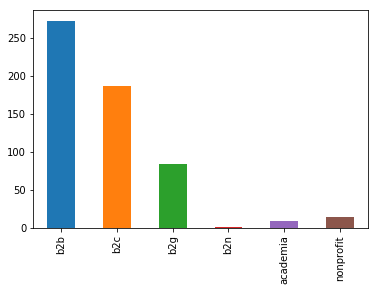

In [473]:
# initializing list with all business models
business_model = pd.Series([b2b, b2c, b2g, b2n, academia, nonprofit], index = ['b2b', 'b2c', 'b2g', 'b2n', 'academia', 'nonprofit'])

print('business model frequencies\n', business_model)
# business model bar plot
print(business_model.plot(kind = 'bar'))

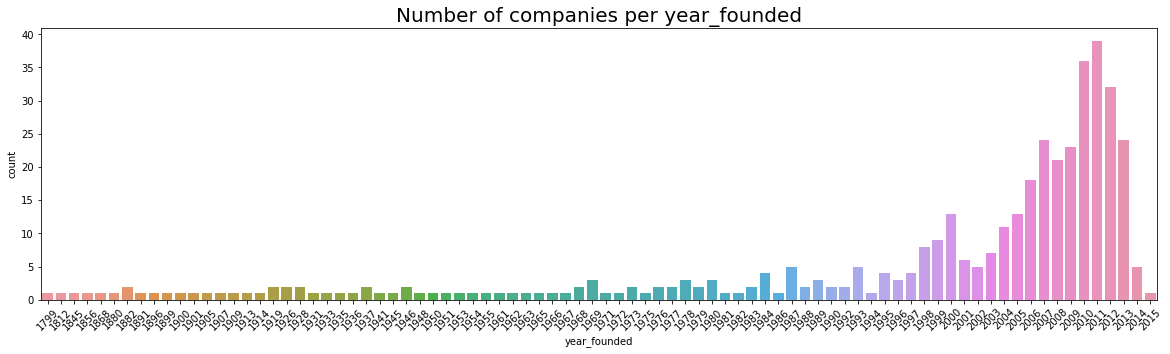

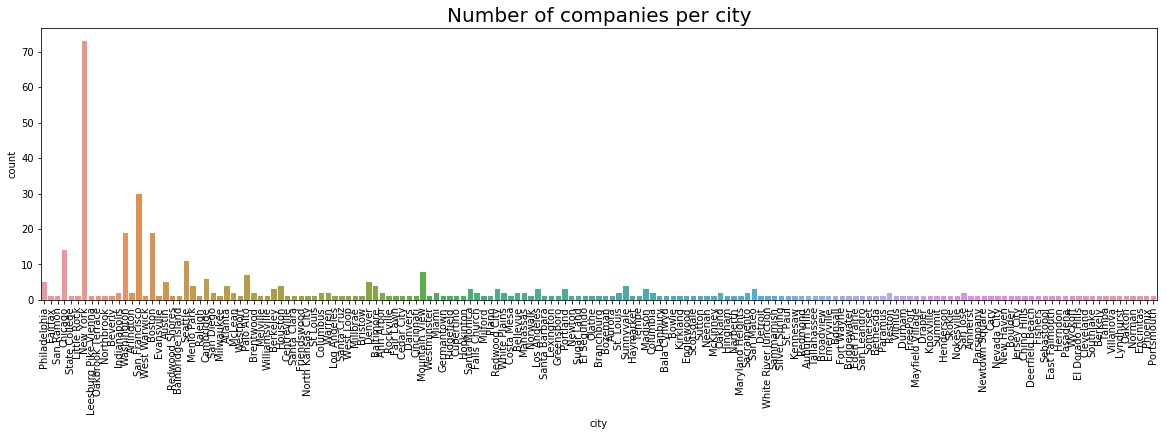

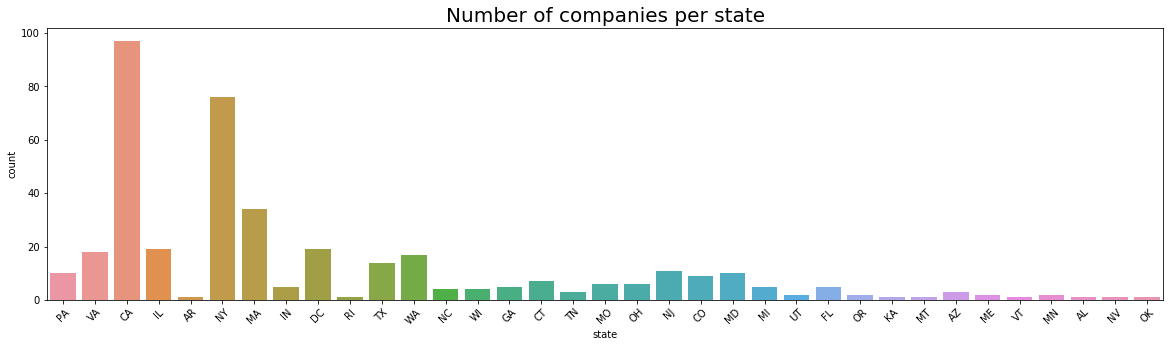

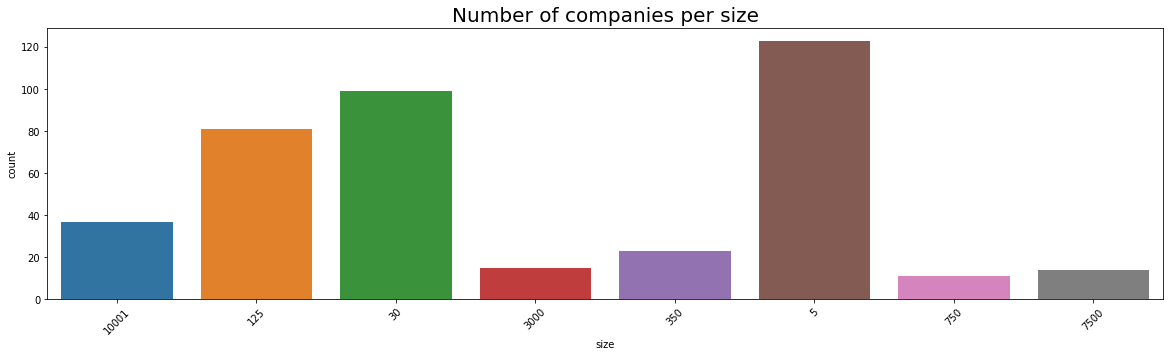

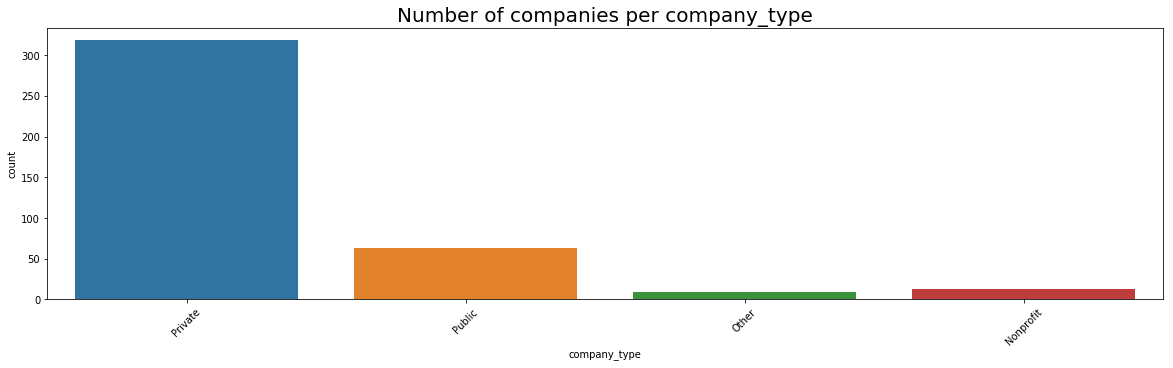

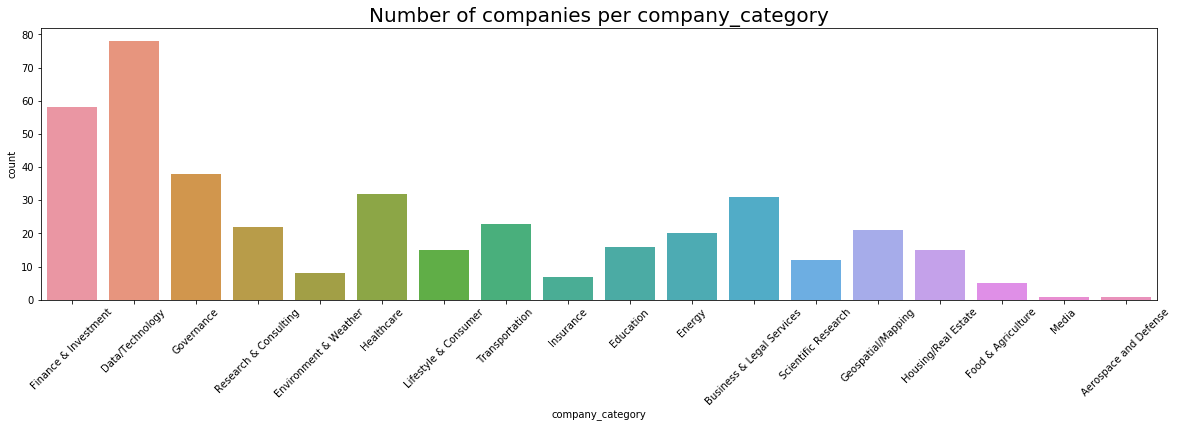

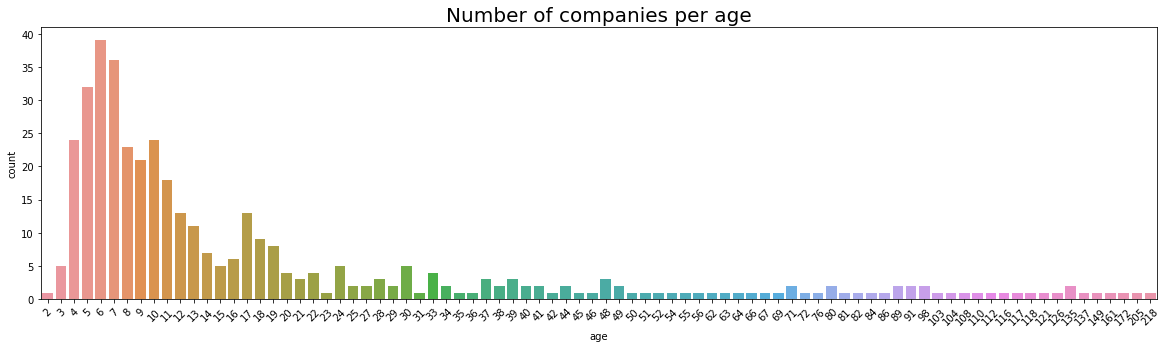

In [474]:
plotCompanies = ['year_founded', 'city', 'state', 'size', 'company_type', 'company_category', 'age']
for column in plotCompanies:
    plt.figure(figsize=(20, 5))

    # count how many vehicles were sold per manufacturer (use original dataframe since df2 is all numbers)
    sns.countplot(x=df[column], data=df)
    rotation = 45
    if (column == 'city'):
        rotation = 90
    plt.xticks(rotation=rotation)

    plt.title('Number of companies per ' + column, fontsize = 20)
    plt.show()

plot graphs sorted


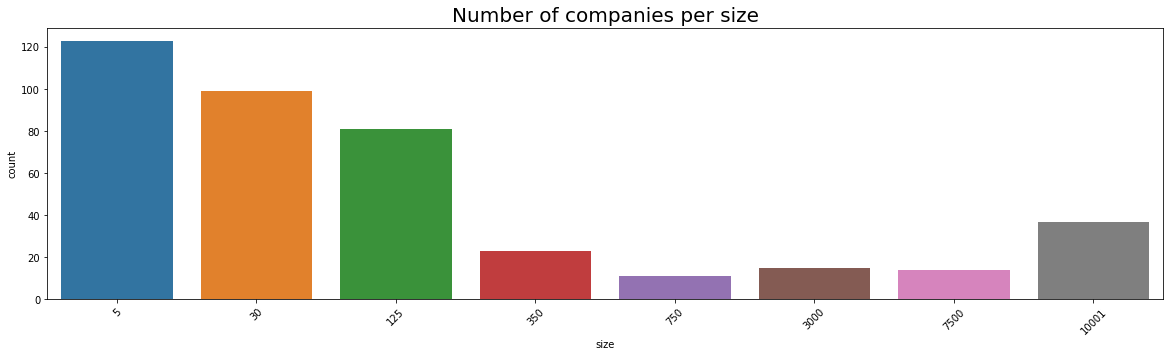

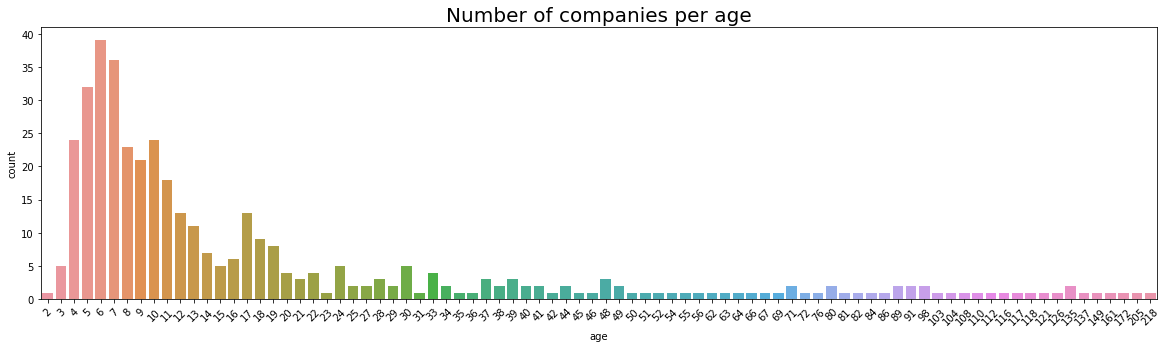

In [475]:
print('plot graphs sorted')
plotCompanies = ['size','age']
for column in plotCompanies:
    plt.figure(figsize=(20, 5))

    # count how many vehicles were sold per manufacturer (use original dataframe since df2 is all numbers)
    sns.countplot(x=df[column].astype(int).sort_values(), data=df)
    rotation = 45
    if (column == 'city'):
        rotation = 90
    plt.xticks(rotation=rotation)

    plt.title('Number of companies per ' + column, fontsize = 20)
    plt.show()

In [476]:
# data csv file contained in the same folder as the project
datafnEnc = 'companiesProcessedEncoded.csv'

# df encoded for dataset with all numerical values instead of categorical
df = pd.read_csv(datafnEnc, na_values = ['?'], header = None)
df.columns = df.iloc[0]
df.drop(axis = 0, index = 0, inplace = True)
df.reset_index(drop = True, inplace = True)
df.drop(columns = np.nan, inplace = True)



In [477]:
intCols = ['year_founded','state','size','company_type',
           'company_category','b2b','b2c','b2g','b2n',
           'academia','nonprofit','age', 'empl_val', 'success']
floatCols = ['money_raised', 'revenue']

# converting columns into int types
for col in intCols:
    df[col] = df[col].astype(int)
for col in floatCols:
    df[col] = df[col].astype(float)
df['revenue'] = df['revenue'].astype(int)

Correlation for different columns

correlation empl_val and year_founded : 0.04712592184457927
correlation empl_val and state : -0.02848083711607957
correlation empl_val and size : -0.05330167992392844
correlation empl_val and company_type : -0.005264394010239076
correlation empl_val and company_category : -0.013953382218065372
correlation empl_val and b2b : 0.03717639145154789
correlation empl_val and b2c : 0.012364561577401626
correlation empl_val and b2g : -0.02782829116358444
correlation empl_val and b2n : -0.00615660215555348
correlation empl_val and academia : -0.016156693020889335
correlation empl_val and nonprofit : -0.021437834562063322
correlation empl_val and money_raised : 0.6515853742734131
correlation empl_val and revenue : 0.4497463216223303
correlation empl_val and age : -0.047125921844579255
correlation empl_val and empl_val : 0.9999999999999999
correlation empl_val and success : 0.34299883597454855

Highest correlation is employee value and revenue
correlation empl_va

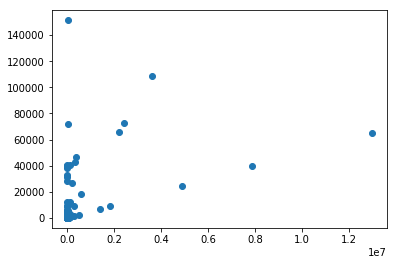

In [478]:
print('Correlation for different columns\n')

for col in df.drop(columns = ['city', 'company_name']).columns:
    
    print('correlation empl_val and', col, ':', str(df['empl_val'].corr(df[col])))
    

    
    
    #print('correlation empl_val and revenue', ':', str(df['empl_val'].corr(df['revenue'])))
print('\nHighest correlation is employee value and revenue')
print('correlation empl_val and revenue:', str(df['empl_val'].corr(df['revenue'])))

plt.scatter(df['empl_val'], df['revenue']);

In [479]:
print('End of EDA\n\n\n\n')
print('_________________________________________________________________________________________________________________')

End of EDA




_________________________________________________________________________________________________________________


In [480]:
print('Beginning primary')

Beginning primary


___

## Loading new clean data

We will have two datasets:

    one called dfFull with all the full names of the values
    
    the other called df with all the encoded values

In [481]:
# data csv file contained in the same folder as the project
datafnFull = 'companiesProcessed.csv'

dfFull = pd.read_csv(datafnFull, na_values = ['?'], header = None)

# check first five rows of the dataset
dfFull.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,NaN,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit,money_raised,revenue,age,empl_val,success
1,0.0,48 Factoring Inc.,2014,Philadelphia,PA,125,Private,Finance & Investment,1,0,0,0,0,0,NaN,1.0,3,8,0
2,1.0,5PSolutions,2007,Fairfax,VA,5,Private,Data/Technology,1,1,1,0,0,0,NaN,1.0,10,200,0
3,2.0,Accela,1999,San Ramon,CA,750,Private,Governance,0,1,0,0,0,0,NaN,80.0,18,107,0
4,3.0,Accenture,1989,Chicago,IL,10001,Public,Research & Consulting,1,0,0,0,0,0,NaN,39600.0,28,3960,1


In [482]:
# setting the elements in the first row as column names
dfFull.columns = dfFull.iloc[0]

# dropping the first row since now we have the correct column names
dfFull.drop(axis = 0, index = 0, inplace = True)

# Use reset_index()
dfFull.reset_index(drop = True, inplace = True)
dfFull.drop(columns = np.nan, inplace = True)
dfFull.head()

,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit,money_raised,revenue,age,empl_val,success
0,48 Factoring Inc.,2014,Philadelphia,PA,125,Private,Finance & Investment,1,0,0,0,0,0,NaN,1.0,3,8,0
1,5PSolutions,2007,Fairfax,VA,5,Private,Data/Technology,1,1,1,0,0,0,NaN,1.0,10,200,0
2,Accela,1999,San Ramon,CA,750,Private,Governance,0,1,0,0,0,0,NaN,80.0,18,107,0
3,Accenture,1989,Chicago,IL,10001,Public,Research & Consulting,1,0,0,0,0,0,NaN,39600.0,28,3960,1
4,AccuWeather,1962,State College,PA,350,Private,Environment & Weather,1,1,1,0,0,0,NaN,59.0,55,169,0


In [483]:
# data csv file contained in the same folder as the project
datafnEnc = 'companiesProcessedEncoded.csv'

# df encoded for dataset with all numerical values instead of categorical
df = pd.read_csv(datafnEnc, na_values = ['?'], header = None)

# check first five rows of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,NaN,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit,money_raised,revenue,age,empl_val,success
1,0.0,48 Factoring Inc.,2014,Philadelphia,26,125,2,6,1,0,0,0,0,0,NaN,1.0,3,8,0
2,1.0,5PSolutions,2007,Fairfax,31,5,2,2,1,1,1,0,0,0,NaN,1.0,10,200,0
3,2.0,Accela,1999,San Ramon,3,750,2,9,0,1,0,0,0,0,NaN,80.0,18,107,0
4,3.0,Accenture,1989,Chicago,9,10001,3,15,1,0,0,0,0,0,NaN,39600.0,28,3960,1


In [484]:
# setting the elements in the first row as column names
df.columns = df.iloc[0]

# dropping the first row since now we have the correct column names
df.drop(axis = 0, index = 0, inplace = True)

# Use reset_index()
df.reset_index(drop = True, inplace = True)

df.drop(columns = np.nan, inplace = True)
print('dataframe we will use for main analysis\n', df.head())

dataframe we will use for main analysis
 0       company_name year_founded           city state   size company_type  \
0  48 Factoring Inc.         2014   Philadelphia    26    125            2   
1        5PSolutions         2007        Fairfax    31      5            2   
2             Accela         1999      San Ramon     3    750            2   
3          Accenture         1989        Chicago     9  10001            3   
4        AccuWeather         1962  State College    26    350            2   

0 company_category b2b b2c b2g b2n academia nonprofit money_raised  revenue  \
0                6   1   0   0   0        0         0          NaN      1.0   
1                2   1   1   1   0        0         0          NaN      1.0   
2                9   0   1   0   0        0         0          NaN     80.0   
3               15   1   0   0   0        0         0          NaN  39600.0   
4                5   1   1   1   0        0         0          NaN     59.0   

0 age empl_val 

___

### Converting values to numerical when appropriate

All values became object types when exported from preprocessing file

In [485]:
intCols = ['year_founded','state','size','company_type',
           'company_category','b2b','b2c','b2g','b2n',
           'academia','nonprofit','age', 'empl_val', 'success']
floatCols = ['money_raised', 'revenue']

In [486]:
# converting columns into int types
for col in intCols:
    df[col] = df[col].astype(int)
for col in floatCols:
    df[col] = df[col].astype(float)


In [487]:
print('Ensuring column types we need are integers or floats\n')
df['revenue'] = df['revenue'].astype(int)
df.info()

Ensuring column types we need are integers or floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 18 columns):
company_name        403 non-null object
year_founded        403 non-null int32
city                403 non-null object
state               403 non-null int32
size                403 non-null int32
company_type        403 non-null int32
company_category    403 non-null int32
b2b                 403 non-null int32
b2c                 403 non-null int32
b2g                 403 non-null int32
b2n                 403 non-null int32
academia            403 non-null int32
nonprofit           403 non-null int32
money_raised        133 non-null float64
revenue             403 non-null int32
age                 403 non-null int32
empl_val            403 non-null int32
success             403 non-null int32
dtypes: float64(1), int32(15), object(2)
memory usage: 33.1+ KB


_____________________

## The question we are trying to answer is: What makes a company successful?

In [488]:
print('The question we are trying to answer is: What makes a company successful?')

The question we are trying to answer is: What makes a company successful?


    
    The target column will be the degree of success of a company. This comes from the ratio between revenue and size and then checking if that revenue is:
    
    greater than 100 000 - successful
    in between 1000 and 100000 - average success or growing
    less than 1000 - not very successful or beginning
    
    
### Since we are dealing with a lot of categorical data the algorithms we will try to run are:
    Linear regression to see if there any good is correlation between the target success and other columns
    
    We will try different classification models such as Naive Bayes Classification, Support Vector Machines, Clustering, and Neural Networks

In [489]:
print('Since we are dealing with a lot of categorical data, the algorithms we will try to run are:')
print('Linear regression to start, but mainly Multiple Linear regression to see if the different features we have can predict our continuous target variable of employee value')
print('We will try different classification models such as Naive Bayes Classification, Support Vector Machines, and Neural Networks to predict the degree of success for new companies')


Since we are dealing with a lot of categorical data, the algorithms we will try to run are:
Linear regression to start, but mainly Multiple Linear regression to see if the different features we have can predict our continuous target variable of employee value
We will try different classification models such as Naive Bayes Classification, Support Vector Machines, and Neural Networks to predict the degree of success for new companies


## Linear Regression

In [490]:
print('\n\nLinear Regression')



Linear Regression


In [491]:
# import LinearRegrssion 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()

def companiesSLR(name1, name2):
    '''  
    name1: independent variable
    name2: dependent variable
    
    builds a simple linear regression model
    and displays the R2 score and the line equation
    '''
    print('Linear regression between', name1, 'and', name2, '\n')
    X1 = df[[name1]]
    Y  = df[name2]

    # training/fitting 
    lm.fit(X1, Y)
    r2 = lm.score(X1, Y)
    b0 = lm.intercept_
    b1 = lm.coef_
    
    print('R^2 = ', r2)
    
    print('b0 = intercept = ', b0)
    print('b1 = coef = ', b1)

    # display line equation
    print(name2, '=', b0, '+', b1[0], '*', name1)
    
    # display regression plot and residual plot side by side
    fig = plt.figure(figsize=(16, 8))
    fig.add_subplot(1,2,1)
    sns.regplot(df[name1], df[name2])
    plt.title('Regression Plot')
    
    fig.add_subplot(1,2,2)
    sns.residplot(df[name1], df[name2])
    plt.title('Residual Plot')

Linear regression between size and revenue 

R^2 =  0.023380137005746815
b0 = intercept =  1926.0785961734464
b1 = coef =  [0.63950776]
revenue = 1926.0785961734464 + 0.639507761595102 * size


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


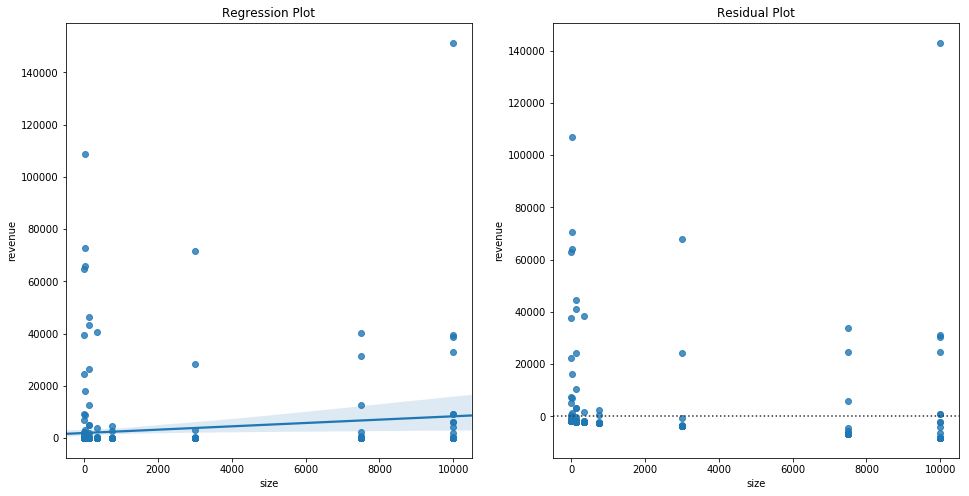

In [492]:
companiesSLR('size', 'revenue')

Linear regression between company_type and revenue 

R^2 =  0.005823992415807222
b0 = intercept =  -926.6347889729204
b1 = coef =  [1800.2431894]
revenue = -926.6347889729204 + 1800.2431893957876 * company_type


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


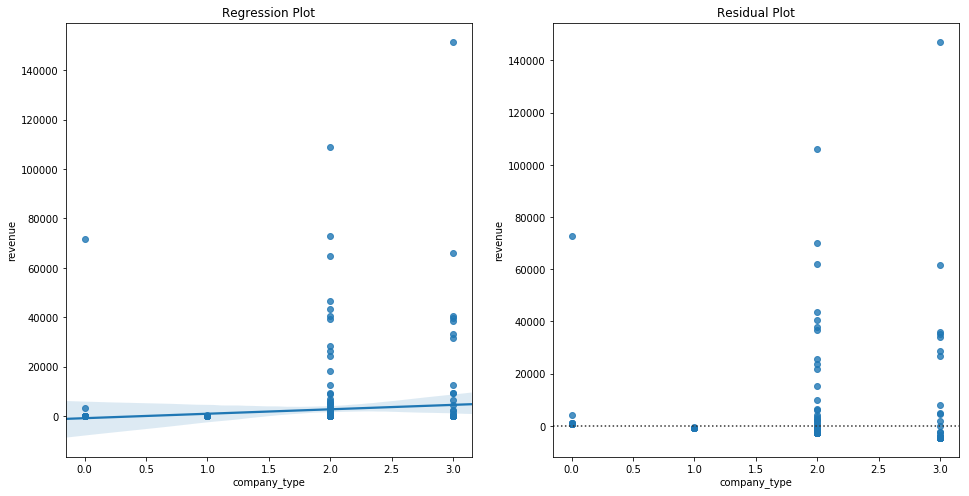

In [493]:
companiesSLR('company_type', 'revenue')

Linear regression between company_category and revenue 

R^2 =  0.00028144153499809477
b0 = intercept =  2476.042531567491
b1 = coef =  [44.27487573]
revenue = 2476.042531567491 + 44.274875732664526 * company_category


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


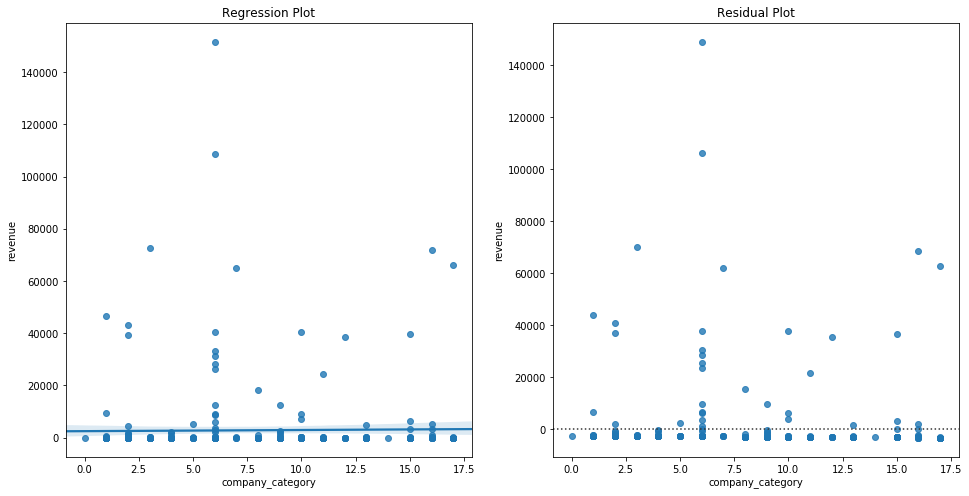

In [494]:
companiesSLR('company_category', 'revenue')

Linear regression between state and revenue 

R^2 =  0.0008428597233184343
b0 = intercept =  3342.641492548455
b1 = coef =  [-37.08793526]
revenue = 3342.641492548455 + -37.08793525677512 * state


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


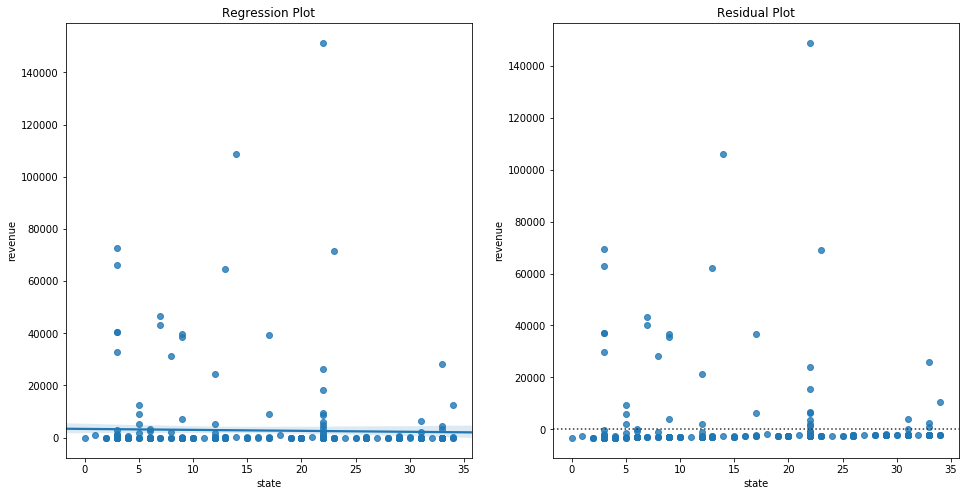

In [495]:
companiesSLR('state', 'revenue')

Linear regression between year_founded and revenue 

R^2 =  0.026048199481056744
b0 = intercept =  135840.6749168251
b1 = coef =  [-66.71273338]
revenue = 135840.6749168251 + -66.712733383951 * year_founded


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


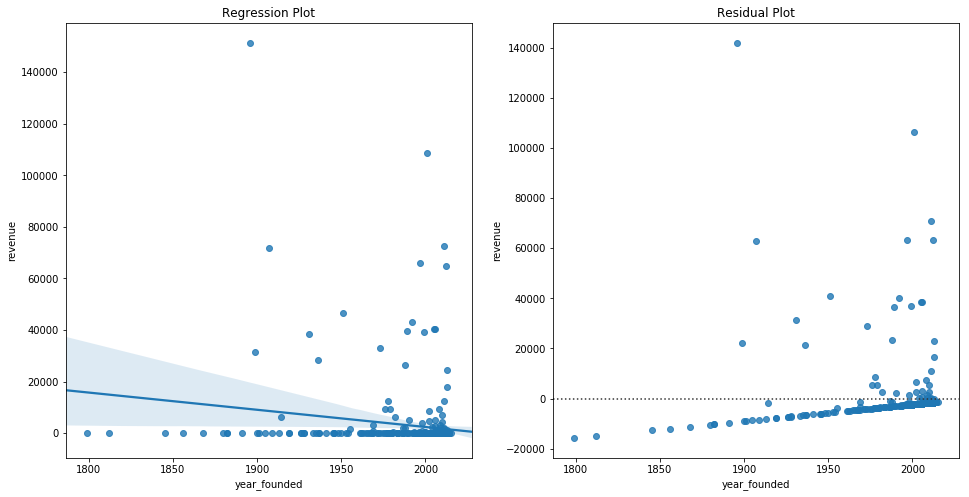

In [496]:
companiesSLR('year_founded', 'revenue')

Linear regression between company_category and size 

R^2 =  0.00034703777964584237
b0 = intercept =  1279.152658865489
b1 = coef =  [11.75518152]
size = 1279.152658865489 + 11.755181516572964 * company_category


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


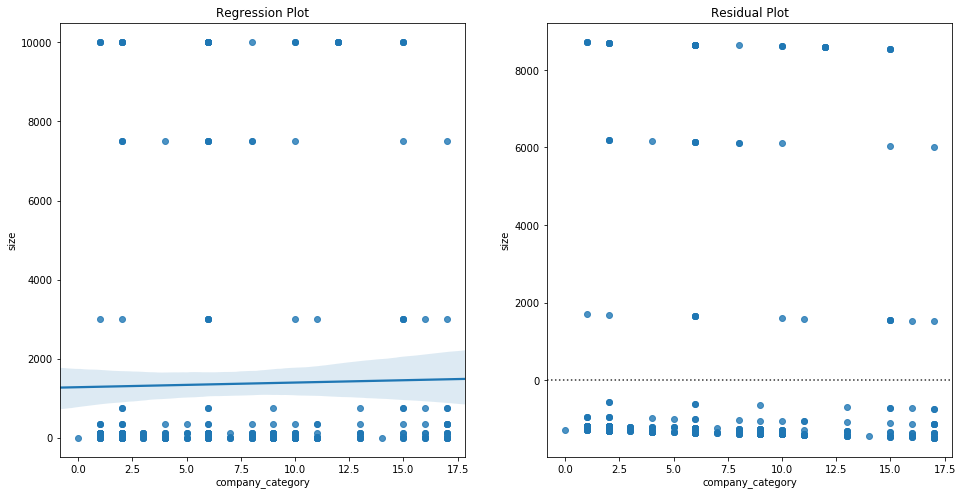

In [497]:
companiesSLR('company_category', 'size')

Linear regression between company_type and size 

R^2 =  0.168827026885762
b0 = intercept =  -3431.133447182241
b1 = coef =  [2317.49853623]
size = -3431.133447182241 + 2317.498536228349 * company_type


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


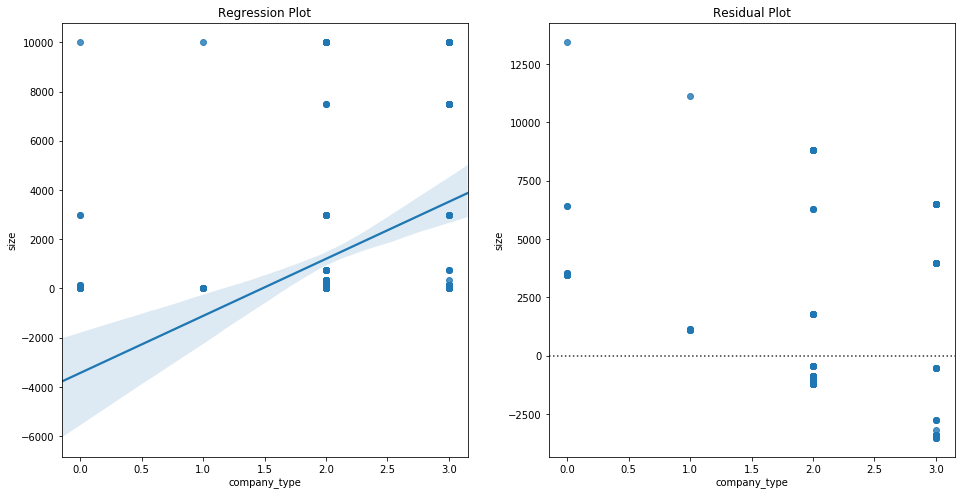

In [498]:
companiesSLR('company_type', 'size')

Linear regression between b2b and empl_val 

R^2 =  0.0013820840813584256
b0 = intercept =  58437.274809160335
b1 = coef =  [66154.79872025]
empl_val = 58437.274809160335 + 66154.79872025142 * b2b


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


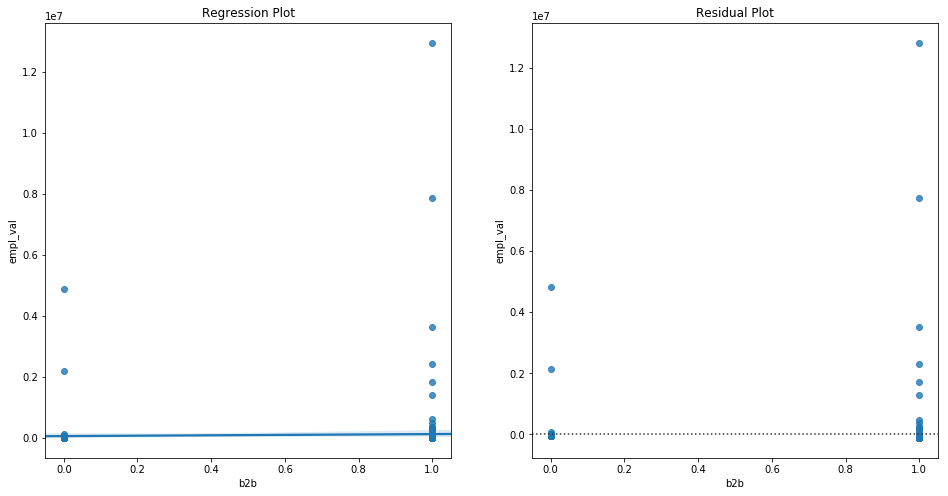

In [499]:
companiesSLR('b2b', 'empl_val')

Linear regression between revenue and empl_val 

R^2 =  0.20227175381281604
b0 = intercept =  22266.775480266093
b1 = coef =  [28.87563087]
empl_val = 22266.775480266093 + 28.87563087412222 * revenue


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


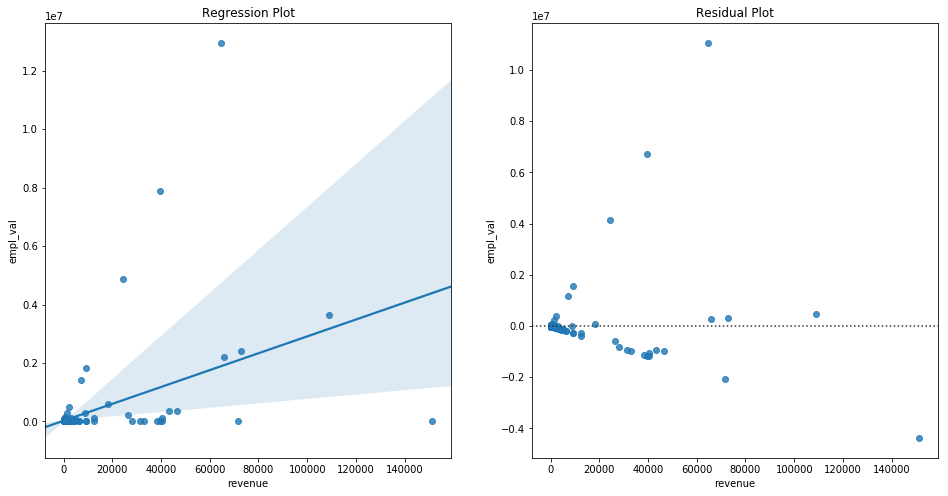

In [500]:
companiesSLR('revenue', 'empl_val')

Linear regression between revenue and empl_val 

R^2 =  0.20227175381281604
b0 = intercept =  22266.775480266093
b1 = coef =  [28.87563087]
empl_val = 22266.775480266093 + 28.87563087412222 * revenue


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


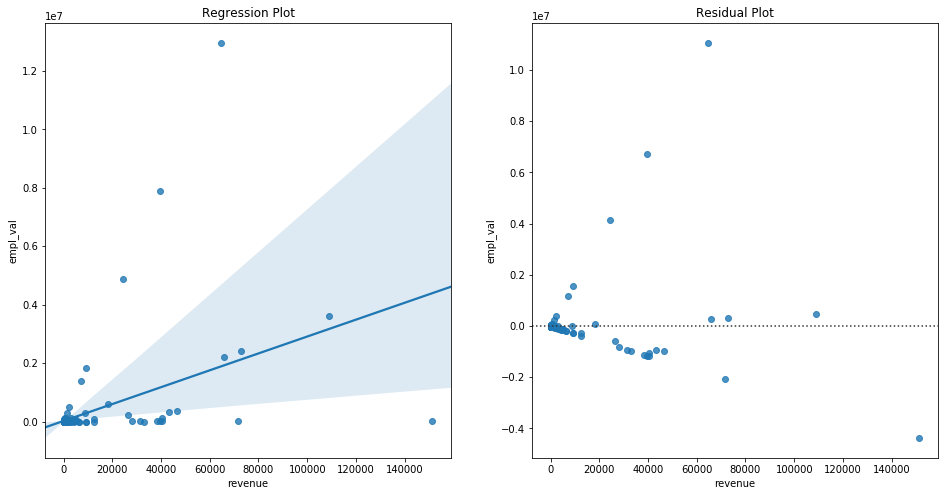

In [501]:
companiesSLR('revenue', 'empl_val')

___

In [502]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


### Splitting the data into 70% training and 30% testing

### Linear regression

### With Cross Validation


In [505]:
# Checking cross validation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print('Linear regression with cross validation')
X = df.drop(columns = ['year_founded', 'city', 'company_name', 'money_raised', 'empl_val', 'success'])
ytarget = df['empl_val']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, ytarget, test_size = .30, random_state = 42)


clf = LinearRegression()

scores = cross_val_score(clf, X, ytarget, cv=5)
print('score array:', scores)
print('scores mean', scores.mean())


print('We get really bad scores')
# lrm.score(Ytest, Yhat)
# How can we get the code to see difference between Yhat and Ytest

Linear regression with cross validation
score array: [-2.39644183e+02 -4.89877121e-01  3.65080916e-01  1.59956138e-01
 -8.35477859e+01]
scores mean -64.63136181176053
We get really bad scores


___

In [506]:
from sklearn.linear_model import LinearRegression

print('\nMultiple Linear Regression\n')
X = df.drop(columns = ['year_founded', 'city', 'company_name', 'money_raised', 'empl_val', 'success'])
ytarget = df['empl_val']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, ytarget, test_size = .30, random_state = 42)
print('Using features:', X.columns, 'and as target', pd.DataFrame(ytarget).columns,'\n\n')

lm = LinearRegression()
lm.fit(Xtrain, Ytrain)
yhat = lm.predict(Xtest)
score = lm.score(Xtest, yhat)
print('score train', lm.score(Xtrain, Ytrain))
print('test train', lm.score(Xtest, Ytest))

mse = mean_squared_error(Ytest, yhat)
print('R^2 score is ', score)
print('mse is ', mse)



Multiple Linear Regression

Using features: Index(['state', 'size', 'company_type', 'company_category', 'b2b', 'b2c',
       'b2g', 'b2n', 'academia', 'nonprofit', 'revenue', 'age'],
      dtype='object', name=0) and as target Index(['empl_val'], dtype='object') 


score train 0.2647623524462499
test train -0.1292311881842516
R^2 score is  1.0
mse is  251257789198.6452


In [507]:
# print(lm.coef_)
# # print(Xtest.columns)
# # print(yhat - Ytest)
# print('min difference', min(abs(yhat - Ytest)))
# print('max difference', max(abs(yhat - Ytest)))
# print(list(zip(yhat, Ytest)))
# # 3 company type 10e4 
# # 5 b2b 10e5
# # 6 b2c 10e5
# # 7 b2g 10e4
# # 8 b2n 10e5
# # 9 academia 10e5
# # 10 nonprofit 10e4
# # age 10e3

# # state 10e1
# # size 10e1
# # company_category 10e2
# # revenue 10e1

# # it's possible to draw with multiple variables. Do multivariable normalization
# import matplotlib.pyplot as plt
# plt.scatter(range(len(yhat)), yhat/ 100)
# plt.scatter(range(len(Ytest)), Ytest/ 100, color = 'r')
# print('min yhat is ', min(yhat), 'max yhat is ', max(yhat))
# print('min Ytest is ', min(Ytest), 'max Ytest is ', max(Ytest))


# plt.scatter(range(len(yhat)), abs(yhat - Ytest))
# model can predict really well the variance in the data
print('Multiple linear regression gives us very odd results.')
print('The R^2 = 1.0 means that the model can perfectly explain the variance in the data, however we get a really big mse score.')
print('We believe we do not have enough data in our dataset. We have lots of small companies, some very big companies, but nothing in between.')
print('A good number of companies have very big revenues, so these outliers significantly affect our data.\n\n')

Multiple linear regression gives us very odd results.
The R^2 = 1.0 means that the model can perfectly explain the variance in the data, however we get a really big mse score.
We believe we do not have enough data in our dataset. We have lots of small companies, some very big companies, but nothing in between.
A good number of companies have very big revenues, so these outliers significantly affect our data.




In [508]:
print('End of regression')
print('_____________________________________________________________________________________\n\n')

End of regression
_____________________________________________________________________________________




____

In [510]:
print('Classification\n\n')
print('We split all our models with 70% training and 30% testing.\n\n')
print('Naive Bayesian Classification')

Classification


We split all our models with 70% training and 30% testing.


Naive Bayesian Classification


### It seems that regression is not the way to go.

# Let's try classification.

## Naive Bayesian Classification

### Splitting the data into 70% training and 30% testing


In [330]:
# X = df.drop(columns = ['year_founded', 'city', 'company_name', 'money_raised', 'empl_val', 'success', 'size', 'revenue'])


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [512]:
X = df.drop(columns = ['year_founded', 'city', 'company_name', 'money_raised', 'empl_val', 'success'])
ytarget = df['success']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, ytarget, test_size = .30, random_state = 42)
print('Features used are ', X.columns)
print('target is degree of success')
model = GaussianNB()
model.fit(Xtrain, Ytrain)
yhat = model.predict(Xtest)
print('Naive Bayes accuracy score:', accuracy_score(Ytest, yhat), '\n')

Features used are  Index(['state', 'size', 'company_type', 'company_category', 'b2b', 'b2c',
       'b2g', 'b2n', 'academia', 'nonprofit', 'revenue', 'age'],
      dtype='object', name=0)
target is degree of success
Naive Bayes accuracy score: 0.7024793388429752 



In [513]:
from sklearn.cross_validation import cross_val_score
from sklearn import svm
X = df.drop(columns = ['year_founded', 'city', 'company_name', 'money_raised', 'empl_val', 'success'])
Ytarget = df['success']
print('Features used are ', X.columns)
print('target is degree of success')
model = GaussianNB()

scores = cross_val_score(model, X, Ytarget, cv = 5)
print('Naive Bayes accuracy score cross validation: ', scores.mean(), '\n')

Features used are  Index(['state', 'size', 'company_type', 'company_category', 'b2b', 'b2c',
       'b2g', 'b2n', 'academia', 'nonprofit', 'revenue', 'age'],
      dtype='object', name=0)
target is degree of success
Naive Bayes accuracy score cross validation:  0.7093608376308798 



In [514]:
print('Naive Bayes Classification does not work so well with out data.\n\n')

Naive Bayes Classification does not work so well with out data.




___

### Naive Bayes Classification does not work so well with out data.

### We'll try Support Vector Machines

In [515]:
print('Support Vector Machines\n')

Support Vector Machines



In [516]:
X = df.drop(columns = ['year_founded', 'city', 'company_name', 'money_raised', 'empl_val', 'success'])
Ytarget = df['success']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Ytarget, test_size = .30, random_state = 42)


In [518]:
# Grid search to check for different parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# params = [{'kernel':['linear','poly','sigmoid', 'rbf'], 'C':['0.01', '1', '30', '100', '1E5', '1E10']}]
params = [{'kernel':['linear','poly','sigmoid', 'rbf'], 'C':[0.001, 0.01, 1, 30, 1E6, 1E10]}]

svm = SVC()
# cv 
grid = GridSearchCV(svm, params )
grid.fit(Xtrain, Ytrain)
print('Using grid search to find best parameters.')
print('Best parameters are:', grid.best_params_)
print('Best estimator is:', grid.best_estimator_, '\n')

scores = grid.cv_results_
print('Mean test score using grid search:', scores['mean_test_score'].mean(), '\n')



Using grid search to find best parameters.
Best parameters are: {'C': 30, 'kernel': 'linear'}
Best estimator is: SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 

Mean test score using grid search: 0.8260933806146573 



In [521]:
# Using the best score found previously kernel = linear, C = 30
# X = df.drop(columns = ['year_founded', 'city', 'company_name', 'money_raised', 'empl_val', 'success', 'size', 'revenue'])
X = df.drop(columns = ['year_founded', 'city', 'company_name', 'money_raised', 'empl_val', 'success'])

Ytarget = df['success']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Ytarget, test_size = .30, random_state = 42)
svm = SVC(kernel='linear', C = 30)
svm.fit(Xtrain, Ytrain)
yhat = svm.predict(Xtest)
print('SVM using best parameters from grid search')
print('Support Vector Machines accuracy score:', accuracy_score(Ytest, yhat), '\n')
# no correlation between size revenue and success so regression
# try multiple linear regression MLR these columns and ratio bc it's continuous. Combined there could be interesting result

SVM using best parameters from grid search
Support Vector Machines accuracy score: 0.9586776859504132 



In [522]:
# SVM with Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn import svm
X = df.drop(columns = ['year_founded', 'city', 'company_name', 'money_raised', 'empl_val', 'success'])
Ytarget = df['success']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Ytarget, test_size = .30, random_state = 42)
clf = svm.SVC(kernel = 'linear', C = 30)
scores = cross_val_score(clf, X, Ytarget, cv = 5)
print('SVM accuracy score cross validation: ', scores.mean(), '\n')
X.columns

SVM accuracy score cross validation:  0.9875918112205031 



Index(['state', 'size', 'company_type', 'company_category', 'b2b', 'b2c',
       'b2g', 'b2n', 'academia', 'nonprofit', 'revenue', 'age'],
      dtype='object', name=0)

In [523]:
print('Check target values that were misclassified. Difference between actual results and predicted results')
print((Ytest - yhat).unique())
#df.loc[357, :]
#df.loc[7, :]
print('The misclassified values only come from 1 degree of success difference, meaning employee values that are very close to the boundaries.')

print('The SVM model probably works well due to the 3 degrees of success we have and how big the gaps are from each other')
print('Something to try in the future can be to add the number of degree of success. Instead of 0-2, do 0-5')

Check target values that were misclassified. Difference between actual results and predicted results
[ 0  1 -1]
The misclassified values only come from 1 degree of success difference, meaning employee values that are very close to the boundaries.
The SVM model probably works well due to the 3 degrees of success we have and how big the gaps are from each other
Something to try in the future can be to add the number of degree of success. Instead of 0-2, do 0-5


___

## Support Vector Machine seems to work really well with our data.

## We will give kmeans clustering a shot

In [524]:
print('Trying kmeans clustering with grid search to see best parameters to use\n\n')
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
X = df.drop(columns = ['city', 'company_name', 'money_raised'])

kmeans = KMeans()
params = {'n_clusters':[2,4,50,100,250, 268]}
grid = GridSearchCV(kmeans, params )
grid.fit(X)


print('best parameters',grid.best_params_)

print('bests estimator', grid.best_estimator_)

Trying kmeans clustering with grid search to see best parameters to use


best parameters {'n_clusters': 268}
bests estimator KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=268, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [525]:
print('Clearly using 268 number of clusters show how kmeans does not work at all with our data')
# Using best parameter found previusly
kmeans = KMeans(n_clusters = 268)
kmeans.fit(X)
Y_means = kmeans.predict(X)
print('the accuracy score is', accuracy_score(ytarget, Y_means))
print('for future reference, try a different clustering model\n\n')

Clearly using 268 number of clusters show how kmeans does not work at all with our data
the accuracy score is 0.007444168734491315
for future reference, try a different clustering model




In [526]:
# from sklearn import cluster
# X = df.drop(columns = ['city', 'company_name', 'money_raised'])

# cluster = cluster.SpectralClustering(n_clusters=200, affinity="precomputed", n_init=200)
# cluster.fit(X)
# yhat = cluster.predict(X)

___

### Clustering was not good for our data. Our data does not contain any significant clusters

## Fortunately,  SVM worked really well with our data with an accuracy score of 98%





## Trying Neural Networks

In [527]:
print('Neural Networks')

Neural Networks


In [528]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# X = df.drop(columns = ['year_founded', 'city', 'company_name', 'money_raised', 'empl_val', 'success', 'size', 'revenue'])
X = df.drop(columns = ['year_founded', 'city', 'company_name', 'money_raised', 'empl_val', 'success'])

Ytarget = df['success']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Ytarget, test_size = .30,  random_state = 42)
scaler = StandardScaler()  
scaler.fit(Xtrain)

Xtrain = scaler.transform(Xtrain)  
Xtest = scaler.transform(Xtest)  

nn = MLPClassifier(alpha = 1e-1, hidden_layer_sizes=(3), max_iter = 4000)
nn.fit(Xtrain, Ytrain)
yhat = nn.predict(Xtest)
print('Accuracy score for neural networks is', accuracy_score(Ytest, yhat))
print('After trying different hidden layer sizes, the best one was: 1 hidden layer, 3 neurons.')
print('however, pretty much many different hidden layers give around the same score around .65-.75')
print('This model can be improved by using a lot more data than what we have.')


Accuracy score for neural networks is 0.6694214876033058
After trying different hidden layer sizes, the best one was: 1 hidden layer, 3 neurons.
however, pretty much many different hidden layers give around the same score around .65-.75
This model can be improved by using a lot more data than what we have.
